### 基于指数衰减的动态奖励函数

场景设定​​：

智能体在股票交易中，需平衡短期收益与长期稳定性。
设计一个奖励函数，对短期高收益给予激励，但随时间推移逐渐衰减奖励信号，防止过度投机。

{0.05: array([0.1       , 0.09512294, 0.09048374, 0.0860708 , 0.08187308,
       0.07788008, 0.07408182, 0.07046881, 0.067032  , 0.06376282,
       0.06065307, 0.05769498, 0.05488116, 0.05220458, 0.04965853,
       0.04723666, 0.0449329 , 0.04274149, 0.04065697, 0.0386741 ,
       0.03678794, 0.03499377, 0.03328711, 0.03166368, 0.03011942,
       0.02865048, 0.02725318, 0.02592403, 0.0246597 , 0.02345703,
       0.02231302, 0.0212248 , 0.02018965, 0.01920499, 0.01826835,
       0.01737739, 0.01652989, 0.01572372, 0.01495686, 0.01422741,
       0.01353353, 0.01287349, 0.01224564, 0.01164842, 0.01108032,
       0.01053992, 0.01002588, 0.00953692, 0.0090718 , 0.00862936]), 0.1: array([0.1       , 0.09048374, 0.08187308, 0.07408182, 0.067032  ,
       0.06065307, 0.05488116, 0.04965853, 0.0449329 , 0.04065697,
       0.03678794, 0.03328711, 0.03011942, 0.02725318, 0.0246597 ,
       0.02231302, 0.02018965, 0.01826835, 0.01652989, 0.01495686,
       0.01353353, 0.01224564, 0.01108032, 0.010

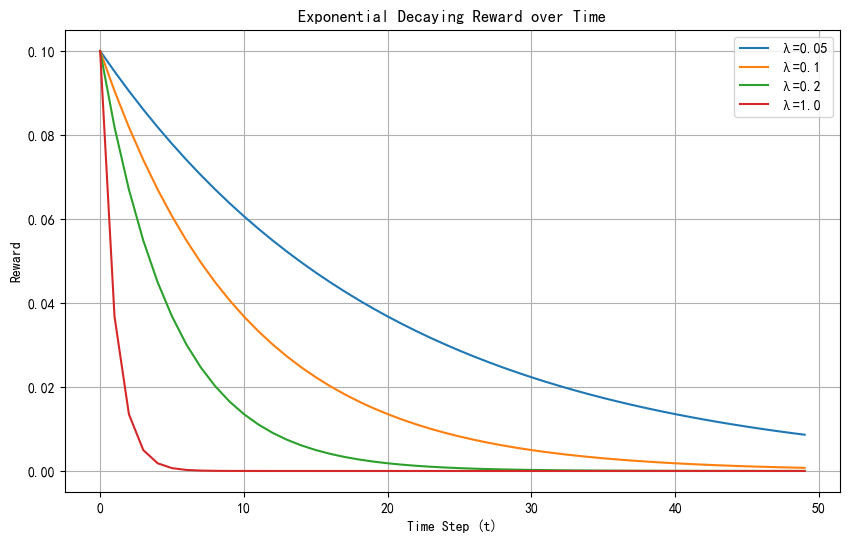

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
lambda_params = [0.05, 0.1, 0.2,1.0]  # 不同衰减系数
time_steps = np.arange(0, 50)      # 时间步0~49
R_t = 0.1                          # 假设每步收益固定为10%

# 计算不同lambda下的衰减奖励
rewards = {}
for lam in lambda_params:
    rewards[lam] = R_t * np.exp(-lam * time_steps)
print( rewards)
# 可视化
plt.figure(figsize=(10, 6))
for lam, reward_curve in rewards.items():
    plt.plot(time_steps, reward_curve, label=f"λ={lam}")

plt.title("Exponential Decaying Reward over Time")
plt.xlabel("Time Step (t)")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()

### 非对称风险惩罚
​- ​场景进阶​​：对亏损（Rt <0）施加指数级惩罚，而对收益使用线性奖励。

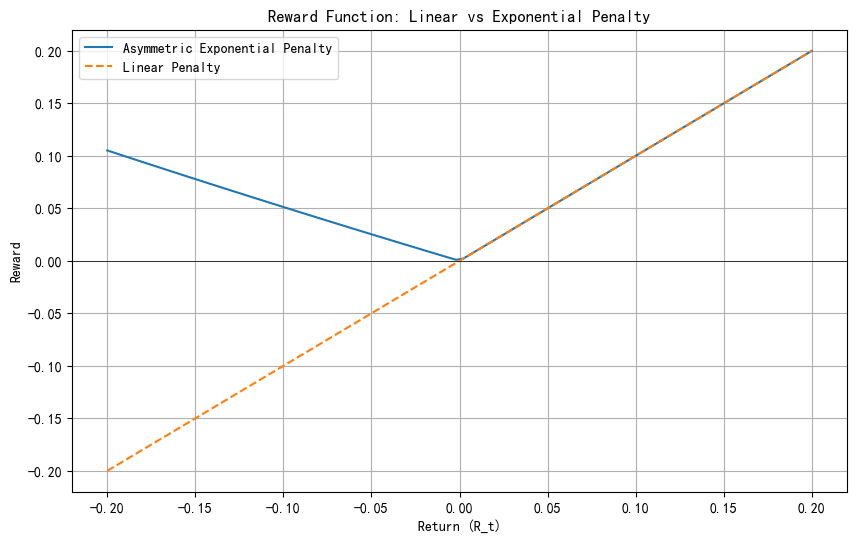

In [2]:
# 风险厌恶系数
eta = 0.5

# 生成收益率序列（含正负）
R_t_values = np.linspace(-0.2, 0.2, 100)  # 收益率从-20%到+20%

# 计算奖励
rewards_asymmetric = np.where(
    R_t_values >= 0,
    R_t_values,                            # 收益保持线性
    np.exp(eta * np.abs(R_t_values)) - 1   # 亏损指数惩罚
)

# 对比线性惩罚（例如 penalty = |R_t|）
rewards_linear = np.where(
    R_t_values >= 0,
    R_t_values,
    -np.abs(R_t_values)
)

# 可视化
plt.figure(figsize=(10, 6))
plt.plot(R_t_values, rewards_asymmetric, label="Asymmetric Exponential Penalty")
plt.plot(R_t_values, rewards_linear, label="Linear Penalty", linestyle="--")
plt.axhline(0, color="black", linewidth=0.5)
plt.title("Reward Function: Linear vs Exponential Penalty")
plt.xlabel("Return (R_t)")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()

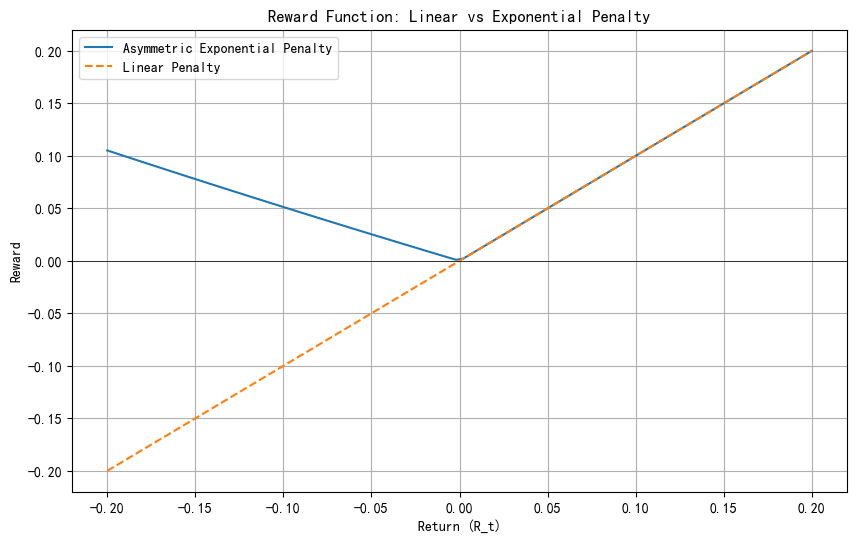

In [6]:
# 风险厌恶系数
eta = 0.5

# 生成收益率序列（含正负）
R_t_values = np.linspace(-0.2, 0.2, 100)  # 收益率从-20%到+20%

# 计算奖励
rewards_asymmetric = np.where(
    R_t_values >= 0,
    R_t_values,                            # 收益保持线性
    np.exp(eta * np.abs(R_t_values)) - 1   # 亏损指数惩罚
)

# 对比线性惩罚（例如 penalty = |R_t|）
rewards_linear = np.where(
    R_t_values >= 0,
    R_t_values,
    -np.abs(R_t_values)
)

# 可视化
plt.figure(figsize=(10, 6))
plt.plot(R_t_values, rewards_asymmetric, label="Asymmetric Exponential Penalty")
plt.plot(R_t_values, rewards_linear, label="Linear Penalty", linestyle="--")
plt.axhline(0, color="black", linewidth=0.5)
plt.title("Reward Function: Linear vs Exponential Penalty")
plt.xlabel("Return (R_t)")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()